In [2]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
from time import time

import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import tensorflow as tf

# Work on Sklearn Datasets

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [7]:
wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
# wine_data.target

In [9]:
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
# wine_data['DESCR']

In [11]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
#display(np.round(wine_data['feature_names']))

In [13]:
feat_data = wine_data['data']

In [67]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [14]:
labels = wine_data['target']

In [62]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feat_data, labels, test_size = 0.3, random_state = 101)

In [16]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# constracting the model using Keras in tensorflow¶

In [17]:
from tensorflow.contrib.keras import models

In [18]:
#creating models
dnn_keras_model = models.Sequential()

In [19]:
# add layers to the model
from tensorflow.contrib.keras import layers

In [20]:
dnn_keras_model.add(layers.Dense(units = 13, activation='relu'))
dnn_keras_model.add(layers.Dense(units= 13, activation = 'relu'))
# last layer have to have an out units of 3 because we are predicting three class
dnn_keras_model.add(layers.Dense(units=3, activation='softmax'))

In [21]:
# compile the model
from tensorflow.contrib.keras import losses, optimizers, metrics, activations

In [22]:
dnn_keras_model.compile(optimizer='adam',
                       loss = 'sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [12]:
#dnn_keras_model.fit(scaled_x_train, y_train, epochs=50)

In [24]:
#getting the predictions
predictions = dnn_keras_model.predict_classes(scaled_x_test)

In [13]:
# evaluating the preformance
from sklearn.metrics import classification_report
#print(classification_report(predictions, y_test))

# DATA from UCI Wine-quality

In [26]:
# Load the red Wine dataset
data = pd.read_csv('./data/winequality-red.csv', sep=';')

# Display the first five records
display(data.head())



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# checking for columns if it have missing informaiton
# data.isnull().any()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
n_wines = data.shape[0]

# Number of wines with quality rating above 6
quality_above_6 = data.loc[(data['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]

# Number of wines with quality rating below 5 
quality_below_5 = data.loc[(data['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]

# Number of wines with quality rating between 5 to 6
quality_between_5 = data.loc[(data['quality'] >= 5) & (data['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]

# Percentage of wines with quality rating above 6 
greater_percent = n_above_6*100/n_wines 

# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))

# Some more additional data analysis
display(np.round(data.describe()))

Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6: 1319
Percentage of wines with quality 7 and above: 13.57%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


In [14]:

#display(pd.plotting.scatter_matrix(data, alpha=0.3, figsize= (40,40), diagonal = 'kde')) #,savefig('scatterplot.pdf'))


In [17]:
# to see the co-relations between features
#correlation = data.corr()
# display(correlation)
#plt.figure(figsize=(14,12))
#heatmap = sns.heatmap(correlation, annot=True, linewidths=0, cmap="RdBu_r")

The squares with positive values show direct co-relationships between features. The higher the values, the stronger these relationships are - they'll be more reddish. 

# pH vs. Fixed Acidity

D:\Miniconda3\envs\learningmodel\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


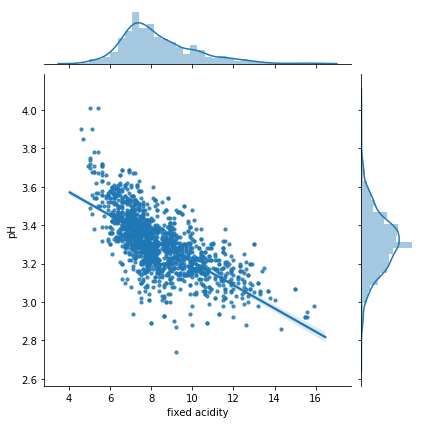

In [32]:
# Visualize the co-relation between pH and fixed Acidity
# Create anew dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

# Initialize a joint-grid with the dataframe using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

# Draws a regression plot in the grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

# Fixed Acidity vs. Citric Acid

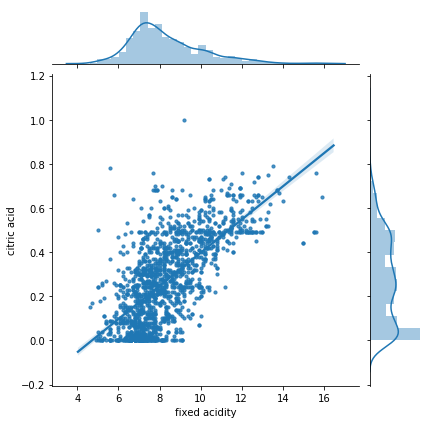

In [33]:
# Visualize the co-relation between pH and fixed Acidity
# Create anew dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['citric acid', 'fixed acidity']]

# Initialize a joint-grid with the dataframe using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_pH, height=6)

# Draws a regression plot in the grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

# Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

# Quality Vs Volatile

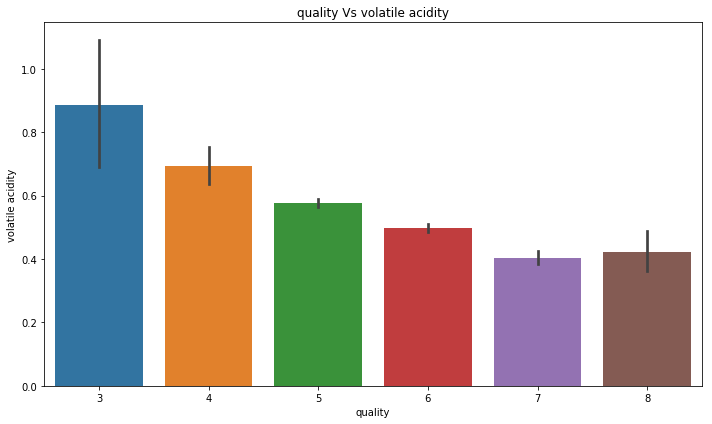

<Figure size 432x288 with 0 Axes>

In [34]:
# to Visualize relationship of discret values better with a bar plot
volatileAcidity_quality = data[['quality', 'volatile acidity']]
fig, axs = plt.subplots(ncols=1, figsize=[10,6])
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality Vs volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

# Quality Vs Alcohol

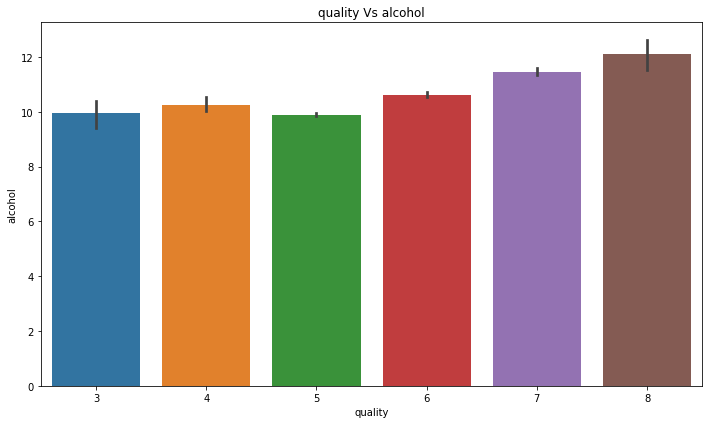

<Figure size 432x288 with 0 Axes>

In [35]:
# to Visualize relationship of discret values better with a bar plot
quality_alcohol = data[['quality', 'alcohol']]
fig, axs = plt.subplots(ncols=1, figsize=[10,6])
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality Vs alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

# looking for an outliers

In [36]:
# For each feature find the data points with extreme high or low values 
for feature in data.keys():
    
    # TODO: Calculate q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calcuate Q3 (75th percentile of the data) for the griven feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <=Q3+step))])
    
# OPTIONAL: Select the indices for data points you wish to remove 
outliers = []

# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.200000,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000,5
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4
33,6.9,0.605,0.12,10.70,0.073,40.0,83.0,0.99930,3.45,0.52,9.400000,6
35,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.600000,6
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
55,7.7,0.620,0.04,3.80,0.084,25.0,45.0,0.99780,3.34,0.53,9.500000,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
81,7.8,0.430,0.70,1.90,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.80,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
106,7.8,0.410,0.68,1.70,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5
109,8.1,0.785,0.52,2.00,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,5.10,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
90,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
294,13.3,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
325,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
354,6.1,0.210,0.40,1.40,0.066,40.5,165.0,0.99120,3.25,0.59,11.900000,6
364,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
374,14.0,0.410,0.63,3.80,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
544,14.3,0.310,0.74,1.80,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
554,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3


In [37]:
# work with the lab data and see what you can generate
# try to see the inter dependance among the features 

# Working  with Vaccine Lab Data

In [5]:
Vac_data = pd.read_excel("./data/VACCINE_data/ETSLabsReport_02955_12142017.xlsx")

In [44]:
df =Vac_data.drop(['Sample Status','Comment','Units'], axis=1)

df.to_csv("./data/VACCINE_data/Vaccine_Lab_data.csv", sep=';')
# df.drop_duplicates(subset = "Sample Description",
#                   keep = False, inplace = True)


In [45]:
# df_site_list = Vac_data["Sample Description"]
# df_site_list.drop_duplicates()

In [46]:
test = df
test.columns

Index(['Date', 'Sample Description', 'Group #', 'Sample #', 'Analysis Name',
       'Result'],
      dtype='object')

In [47]:
# for i in test['Sample Description']:
#     test[test[i]]

In [48]:
df_site = test[test["Sample Description"] == "Site 1TSCS"]

In [49]:
df_site[test["Analysis Name"]== "pH"]

D:\Miniconda\envs\model\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Sample Description,Group #,Sample #,Analysis Name,Result
5,2017-09-29,Site 1TSCS,1064680,709281185,pH,3.65


In [50]:
df_site[test["Analysis Name"]== "brix"]

D:\Miniconda\envs\model\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Sample Description,Group #,Sample #,Analysis Name,Result
12,2017-09-29,Site 1TSCS,1064680,709281185,brix,23.4


In [52]:
group_num = set()
# group_num.clear()
My_map = {}
n = 0
for index, row in test.iterrows():
    
    grp = row['Group #']
    
    # alled assigned
    if grp in group_num:
        # need to add the data the dataframe
        # replace the dataframe with the new label
        #print("replace ", grp, "by ", n ) #My_map[grp])
        
    # a new number 
    elif grp not in group_num:
        n = n+1
        cov = { n : grp}
        My_map.update(cov)
        #print("n ", grp, "equals ", n, )
        group_num.add(grp)
        
    for x, y in My_map.items():
        #print(x,y)

IndentationError: expected an indented block (<ipython-input-52-79cc8b838ec4>, line 16)